In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [20]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'])

#make sure the data has no null values & also no object type
X.head()

,sepal_len,sepal_wid,petal_len,petal_wid
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
X.isnull().sum()

sepal_len    0
sepal_wid    0
petal_len    0
petal_wid    0
dtype: int64

In [13]:
Y = pd.DataFrame(iris.target, columns=['class'])

# Standardize to mean=0 & variance=1

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [17]:
from sklearn.decomposition import PCA

In [33]:
# using pca to reduce the dimensions from 4 to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)
principal_components[:5]

# Note: the above dataset can then be passed into any machine learning model to predict the test data

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [31]:
new_X = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
new_X.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


# Finally, we can use a scree plot to visualize the percentage of variance explained by each principal component

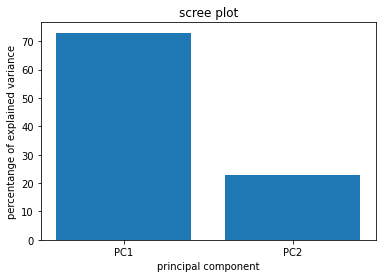

In [32]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')
plt.show()